In [15]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler 
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.impute import SimpleImputer
from imblearn.pipeline import Pipeline

In [2]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_online/cic_train_sample_binary.csv'
CICDataset_train = pd.read_csv(train_dataset_path)
X_train, y_train = CICDataset_train.iloc[:, :-1], CICDataset_train['Label']

In [3]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

ATTACK    113747
BENIGN    113747
Name: Label, dtype: int64
Axes(0.22375,0.11;0.5775x0.77)


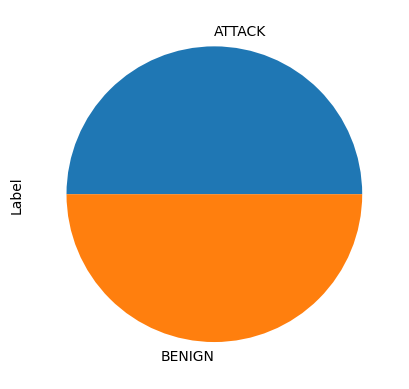

In [4]:
print(y_resampled.value_counts())
print(y_resampled.value_counts().plot.pie())

In [5]:
df_cic_balanced = pd.concat([X_resampled, y_resampled], axis=1)

In [6]:
df_cic_balanced.to_csv("cic_train_sample_binary_randomoversampled.csv", index=False)

In [7]:
print('Class distribution before oversampling:', Counter(y_train))

Class distribution before oversampling: Counter({'BENIGN': 113747, 'ATTACK': 27790})


In [16]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('smote', SMOTE(random_state=42))
])

In [17]:
X_resampled2, y_resampled2 = pipeline.fit_resample(X_train, y_train)

In [18]:
print('Class distribution after oversampling:', Counter(y_resampled2))

Class distribution after oversampling: Counter({'ATTACK': 113747, 'BENIGN': 113747})


In [21]:
np_cic_balanced_smote = np.concatenate((X_resampled2, y_resampled2.values.reshape(-1, 1)), axis=1)

In [23]:
df_cic_balanced_smote = pd.DataFrame(np_cic_balanced_smote, columns=list(X_train.columns) + ['Label'])
df_cic_balanced_smote.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,80.0,249.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATTACK
1,80.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ATTACK
2,55209.0,15.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,36778.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,54347.0,25.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN


In [24]:
df_cic_balanced_smote.to_csv("cic_train_sample_binary_smote.csv", index=False)